In [158]:
import torch
import matplotlib.pyplot as plt
import math

In [12]:
mass = 10e5 #kg
stiffness = 10e10 #kN/m
k = stiffness

In [13]:
M=torch.eye(4,4)*mass

In [14]:
K=torch.tensor([[k,-k,0,0],[-k, 2*k, -k, 0],[0, -k, 2*k, -k],[0,0,-k,2*k]])

In [20]:
#dynamic matrix
D=torch.mm(M,K)

tensor([[ 1.0000e+17, -1.0000e+17,  0.0000e+00,  0.0000e+00],
        [-1.0000e+17,  2.0000e+17, -1.0000e+17,  0.0000e+00],
        [ 0.0000e+00, -1.0000e+17,  2.0000e+17, -1.0000e+17],
        [ 0.0000e+00,  0.0000e+00, -1.0000e+17,  2.0000e+17]])

In [23]:
L,V = torch.linalg.eig(D)
print(L)
print(V)

tensor([1.2061e+16+0.j, 1.0000e+17+0.j, 2.3473e+17+0.j, 3.5321e+17+0.j])
tensor([[-6.5654e-01+0.j,  5.7735e-01+0.j, -4.2853e-01+0.j, -2.2801e-01+0.j],
        [-5.7735e-01+0.j,  1.1302e-07+0.j,  5.7735e-01+0.j,  5.7735e-01+0.j],
        [-4.2853e-01+0.j, -5.7735e-01+0.j,  2.2801e-01+0.j, -6.5654e-01+0.j],
        [-2.2801e-01+0.j, -5.7735e-01+0.j, -6.5654e-01+0.j,  4.2853e-01+0.j]])


In [268]:
def graph_mode(V,L,mode):
    # display mode shape on graph
    x=V[:,mode-1]
    x = torch.cat((x,torch.zeros(1)))
    x=torch.real(x)
    print(x)
    x = x/max(abs(x))
    ax = plt.gca()
    ax.set_aspect('equal')
    mat_size = V.size()[0]
    y = torch.linspace(0,mat_size+1,mat_size+1)  
    plt.plot(x,y)
    plt.title(f"mode: {mode}")
    
    period = 2*math.pi/torch.sqrt(torch.real(L))
    print(f"Period: {period[mode-1]}s")


tensor([0.7238, 0.5639, 0.3594, 0.1701, 0.0000])
Period: 18.305683135986328s


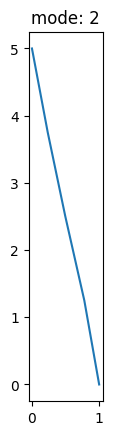

In [274]:
# 4 story example
Mass=torch.eye(4)*torch.tensor([[1],[2],[2],[3]])*1500.0
Stiff = torch.tensor([[1,-1,0,0],[-1,3,-2,0],[0,-2,5,-3],[0,0,-3,7]])*800.0
D=torch.mm(torch.inverse(Mass),Stiff)
L,V = torch.linalg.eig(D)
graph_mode(V,L,2)

tensor([ 0.7014, -0.7128,  0.0000])
Period: 0.07086193561553955s


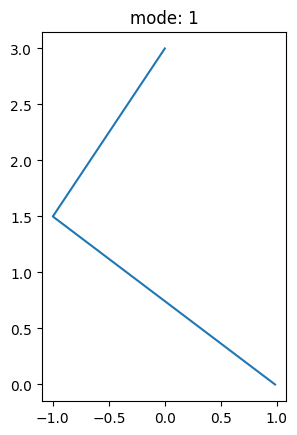

In [276]:
# 2 story example
M = torch.Tensor([[20.39,0],[0,15.29]])
K = torch.Tensor([[98740, -60587],[-60587,60587]])
D = torch.mm(torch.inverse(M),K)
L,V = torch.linalg.eig(D)
graph_mode(V,L,1)